In [87]:
from IPython.display import clear_output

In [76]:
!pip install selenium
!pip install webdriver_manager
clear_output()

In [113]:
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium import webdriver

from webdriver_manager.chrome import ChromeDriverManager

import time

from IPython.display import Image, display
from PIL import Image

import requests

from io import BytesIO

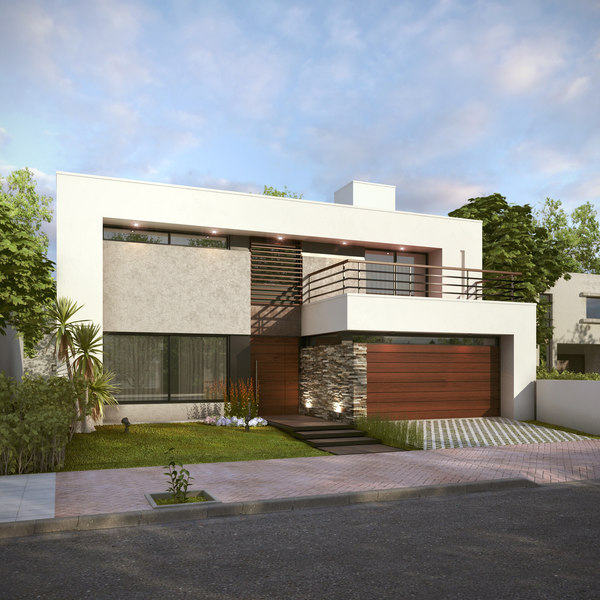

https://static.turbosquid.com/Preview/2018/11/28__13_18_22/cam1001.jpg565CEA9C-0816-4465-AC6F-80CB6A79AC4BLarge.jpg


KeyboardInterrupt: Interrupted by user

In [115]:
QUERY = 'modern house'
IDS = {
    'search_bar': '/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input',
    'image_small': 'wXeWr islib nfEiy',
    'image_big': '/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div/a/img',
    'next_button': '/html/body/div[2]/c-wiz/div[3]/div[2]/div[3]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[1]/a[3]'
}

WAIT_LIMIT = 10

DATA_DIR = 'modern_houses_raw'

# open browser with google.com
service = Service(ChromeDriverManager().install())
driver  = webdriver.Chrome(service=service)
driver.get("https://www.google.com")

# locate search bar, input query and press ENTER
search_bar = driver.find_element(By.XPATH, IDS['search_bar'])
search_bar.send_keys(QUERY)
search_bar.send_keys(Keys.ENTER)

# go on the image search page
pictures_button = driver.find_element(By.PARTIAL_LINK_TEXT, 'Картинки')
pictures_button.click()

# get all the a's that contains small images
images_small = driver.find_elements(By.TAG_NAME, 'a')

# getting the first div frames of small image
first_frame = list(filter(lambda image: image.get_dom_attribute('class') == IDS['image_small'], images_small))[0]

# clicking on first frame and getting the big picture source link
first_frame.click()

# amount of valid images 
valid_images = 0

# parsing images till infinity
while(valid_images < 1000):
    
    # locating the part which contains the big image
    image_big = driver.find_element(By.XPATH, IDS['image_big'])
    
    # waiting till it's fully loaded
    k = 0
    while ('data:image' in image_big.get_attribute("src") or\
           'encrypted' in image_big.get_attribute("src")) and k < WAIT_LIMIT:
        time.sleep(0.2)
        k += 1
        
    # save the image
    if k != WAIT_LIMIT:
        
        # flag if couldn't connect to the source
        failed_connect = False
        
        # getting the utl
        image_url = image_big.get_attribute("src")
        
        # getting the image bytes
        try:
            raw_bytes = requests.get(image_url)
        except: 
            print(f"couldn't connect to {image_url}")
            failed_connect = True
        
        # not doing the saving and validation if don't get picture
        if not failed_connect:
            
            # flag for incorrect iamge format
            corrupted_image = False
            
            # read and show the image
            try:
                image = Image.open(BytesIO(raw_bytes.content))
                display(image)
            except:
                corrupted_image = True
            
            # checking if image can open correctly
            if not corrupted_image:

                # validating the image and discarding if its not fitting
                print(image_url)
                yes_no = input(f'Valid {QUERY}?')
                if yes_no == '':

                    # tring to save it in jpg
                    try:
                        image.save(f'{DATA_DIR}/{valid_images}.jpg')
                        valid_images += 1
                    except:
                        pass
                
        clear_output()
            
    # locating and click the next button
    next_button = driver.find_element(By.XPATH, IDS['next_button'])
    next_button.click()

# References

* Scraping the google: https://stackoverflow.com/a/61248495
* Download images by urls: https://stackoverflow.com/a/23489503